<a href="https://colab.research.google.com/github/christiantommasi/MeuPortf-lioEmPythonER/blob/main/energia_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objetivos com o projeto de consumo de Energia

1. Após conclusão do projeto, vou criar duas variáveis que armazenam os valores de data e previsão (que se refere à previsão de consumo de energia) para armazenar os dados e plotar visualmente para comparação.

2. Com esse projeto, pretendo adiquir futuros dados de consumo de energia, levando assim, à um cálculo de quanto será consumido em Wh por um período X de dias, semanas ou meses, podendo se preparar e planejar qual seria o consumo em energia e o gasto que isso traria ao bolso.

3. É um projeto didático, fictício que extrai do kaggle, para aprendizado e aperfeiçoamento das habilidades, futuramente, pretendo ingressar em projetos reais nas competições que encontrei no site.

4. Em breve, após conclusão de mais 3 ou 4 projetos como esse de estudo, pretendo introduzir projetos reais que realmente agregam valor ao mundo real, como predição de preços de imóveis, vendas em ecommerce, projetos de investimentos, etc.

Importação das bibliotecas necessárias

In [ ]:
if(!require(repr)) install.packages("repr")
library(repr)
if(!require(MASS)) install.packages("MASS")
library(MASS)
if(!require(nortest)) install.packages("nortest")
library(nortest)
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

In [2]:
#Definindo o tamanho do gráfico para exibição de 15x6
options(repr.plot.width=15, repr.plot.height=8.5)

Importação do arquivo csv

In [ ]:
dados = read.csv("energy.csv", sep=",", header=T)
head(dados, 1)

Renomeando as colunas para melhor interpretação
#Explicação dos nomes das colunas:
1. Data: Dias e horários que os dados foram coletados
2. Usada: Energia usada em Wh
3. Luzes: Energia usada nos cômodos da casa em Wh
4. TempCoz: Temperatura da cozinha
5. UmiCoz: Umidade da cozinha
6. TempSala: Temperatura da sala
7. UmiSala: Umidade da Sala
8. TempLava: Temperatura da lavanderia
9. UmiLava: Umidade da lavanderia
10. TempEsc: Temperatura do escritório
11. UmiEsc: Umidade do escritório
12. TempBan: Temperatura do banheiro
13. UmiBan: Umidade do banheiro
14. TempImoLN: Temperatura externa do imóvel lado norte
15. UmiImoLN: Umidade externa do imóvel lado norte
16. TempPasRou: Temperatura do ambiente de passar roupa
17. UmiPasRou: Umidade do ambiente de passar roupa
18. TempQua1: Temperatura quarto 1
19. UmiQua2: Umidade quarto 1
20. TempQua2: Temperatura quarto 2
21. UmiQua2: Umidade quarto 2
22. TempExt: Temperatura externa
23. Pressao: Pressão atmosférica
24. UmiExt: Umidade externa
25. VenVelo: Vento velocidade
26. Visibilidade: Visibilidade (da estação meteorológica de Chièvres)
27. PontoOrvalho: Ponto de Orvalho
28. Aleatoria 1
29. Aleatoria 2

In [4]:
colnames(dados) = c("Data","Usada","Luzes","TempCoz","UmiCoz","TempSala","UmiSala","TempLava","UmiLava",
                    "TempEsc","UmiEsc","TempBan","UmiBan","TempImoLN","UmiImoLN","TempPasRou","UmiPasRou",
                    "TempQua1","UmiQua1","TempQua2","UmiQua2","TempExt","Pressao","UmiExt","VenVelo","Visibilidade",
                    "PontoOrvalho","Aleatoria1","Aleatoria2")

#dados$X = NULL

head(dados, 1)

,Data,Usada,Luzes,TempCoz,UmiCoz,TempSala,UmiSala,TempLava,UmiLava,TempEsc,⋯,TempQua2,UmiQua2,TempExt,Pressao,UmiExt,VenVelo,Visibilidade,PontoOrvalho,Aleatoria1,Aleatoria2
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2016-01-11 17:00:00,60,30,19.89,47.59667,19.2,44.79,19.79,44.73,19,⋯,17.03333,45.53,6.6,733.5,92,7,63,5.3,13.27543,13.27543


In [5]:
#Reescrevendo um novo arquivo CSV
#write.table(dados, file="energy1.csv", sep=",", fileEncoding="UTF-8")

Verificando presença de valores NAs

In [ ]:
#Verificando qualquer NAs
anyNA(dados)

Fazendo o tratamento das colunas para análise dos dados, foram encontrados alguns valores inconsistentes para o modelo de machine learning

In [ ]:
"
#Verificando a presença de valores 0 (zero) no data frame
colunascomzero = sapply(dados, function(col) any(col == 0))
colunascomzero

#Retornando o nome das colunas com zero
colunanomescomzero = names(colunascomzero[colunascomzero])
colunanomescomzero"

À partir daqui começo o tratamento de outliers, coluna por coluna, após o tratamento dos outliers, inicio o processo de normalização dos dados ou o mais próximo possível de uma normalização de dados para o cálculo de machine learning:


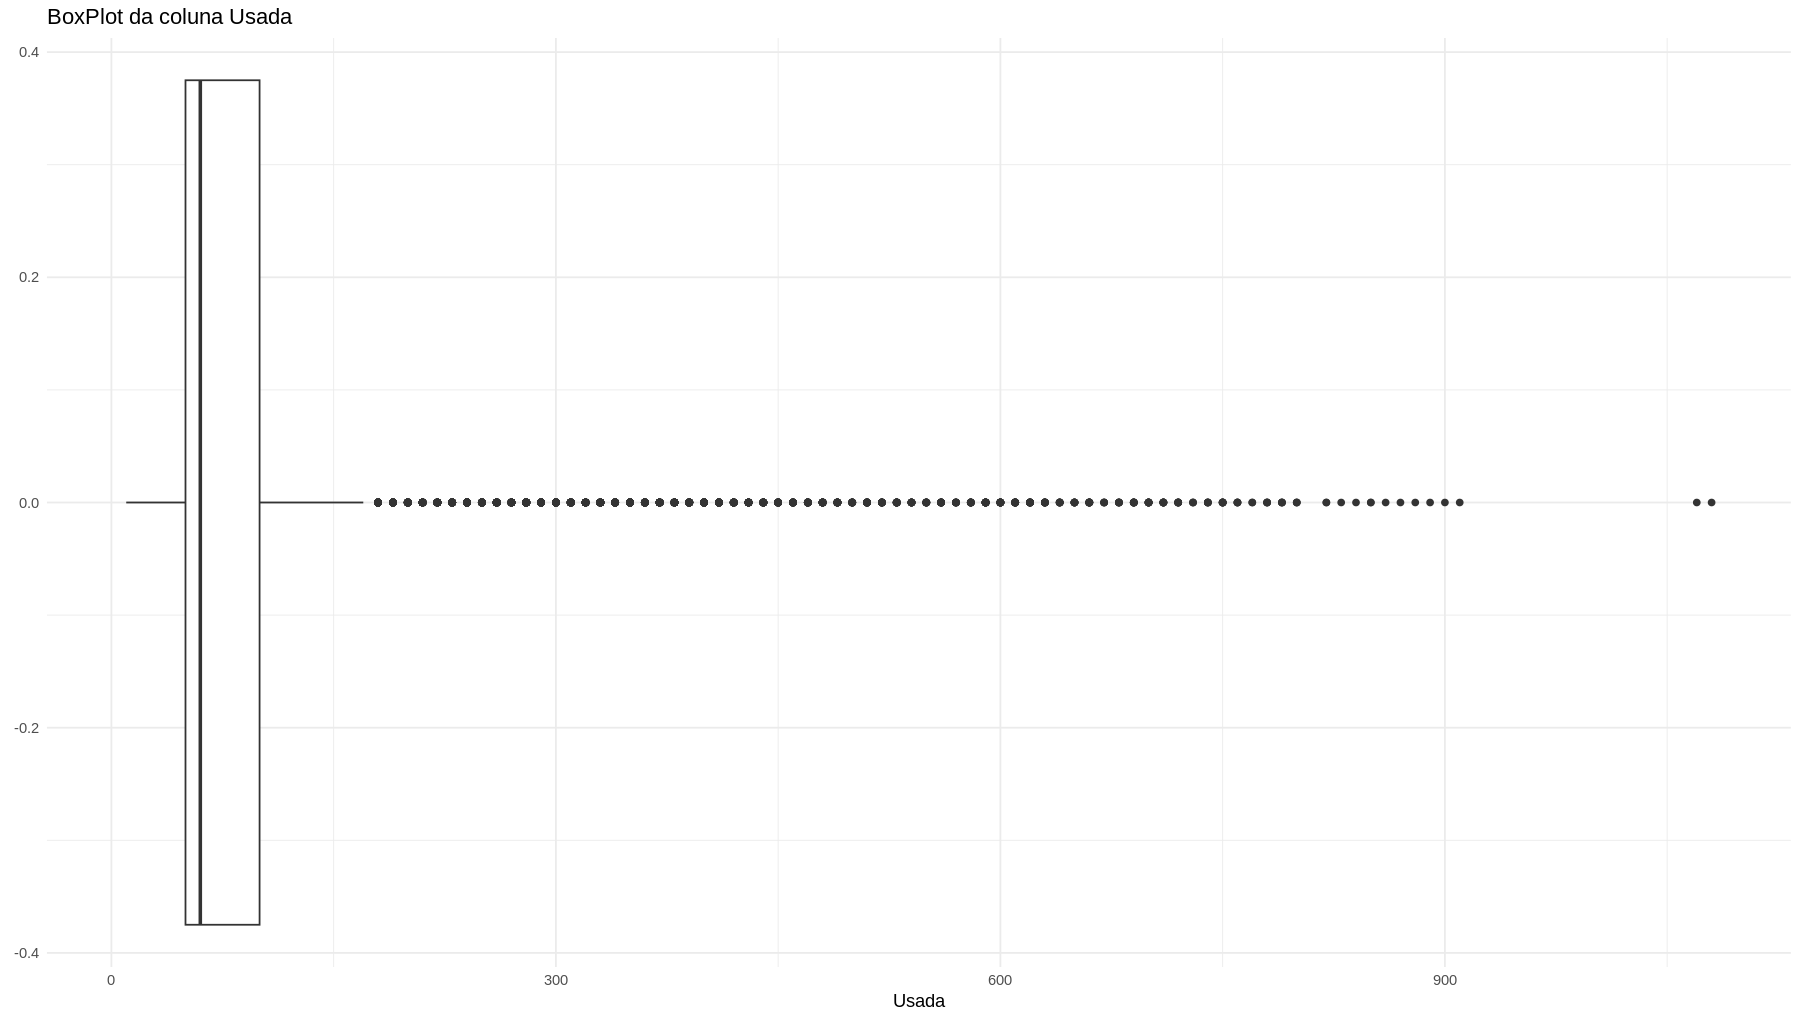

In [8]:
#Verificando outliers na coluna Usada
boxusada = ggplot(dados, aes(y=Usada)) + geom_boxplot() + coord_flip() + labs(title="BoxPlot da coluna Usada") + theme_minimal()
boxusada

In [ ]:
summary(as.factor(dados$Usada))

Removendo os picos de Outliers

In [ ]:
#Removendo os picos de outliers com IQR
q1 = quantile(dados$Usada, 0.25) #Quartil 1
q3 = quantile(dados$Usada, 0.75) #Quartil 3
iqr = q3 - q1

#Criando uma variável que armazena os valores de outliers
outliers = dados$Usada[dados$Usada < q1 | dados$Usada > q3]

#Removendo outliers com limite IQR
limite_inferior_usada = q1 - 1.5 * iqr
limite_superior_usada = q3 + 1.5 * iqr

#Armazenando os dados em uma variável sem outliers
dados_usada_sem_outliers = dados$Usada[dados$Usada >= limite_inferior_usada & dados$Usada <= limite_superior_usada]
#length(dados_usada_sem_outliers)
"Foram criados 17597 dados contra 19735 dados do data frame"

#Criando a variável que armazena a mediana de Usada sem outliers
mediana_usada_sem_outliers = median(dados_usada_sem_outliers)
#mediana_usada_sem_outliers
"Retornou a mediana de 60"

Criando um data frame

In [ ]:
#Criando um data frame
df = dados

#Substituindo os valores dos limites por NA
df$Usada = ifelse (dados$Usada >= limite_inferior_usada & dados$Usada <= limite_superior_usada, dados$Usada, NA)

#Preenchendo os valores de NAs na coluna Usada
df$Usada[is.na(df$Usada)] = mediana_usada_sem_outliers

#Verificando o resultado
summary(df$Usada)

In [ ]:
summary(as.factor(df$Usada))

Plotando um gráfico de histograma, dispersão com linha de regressão e box plot

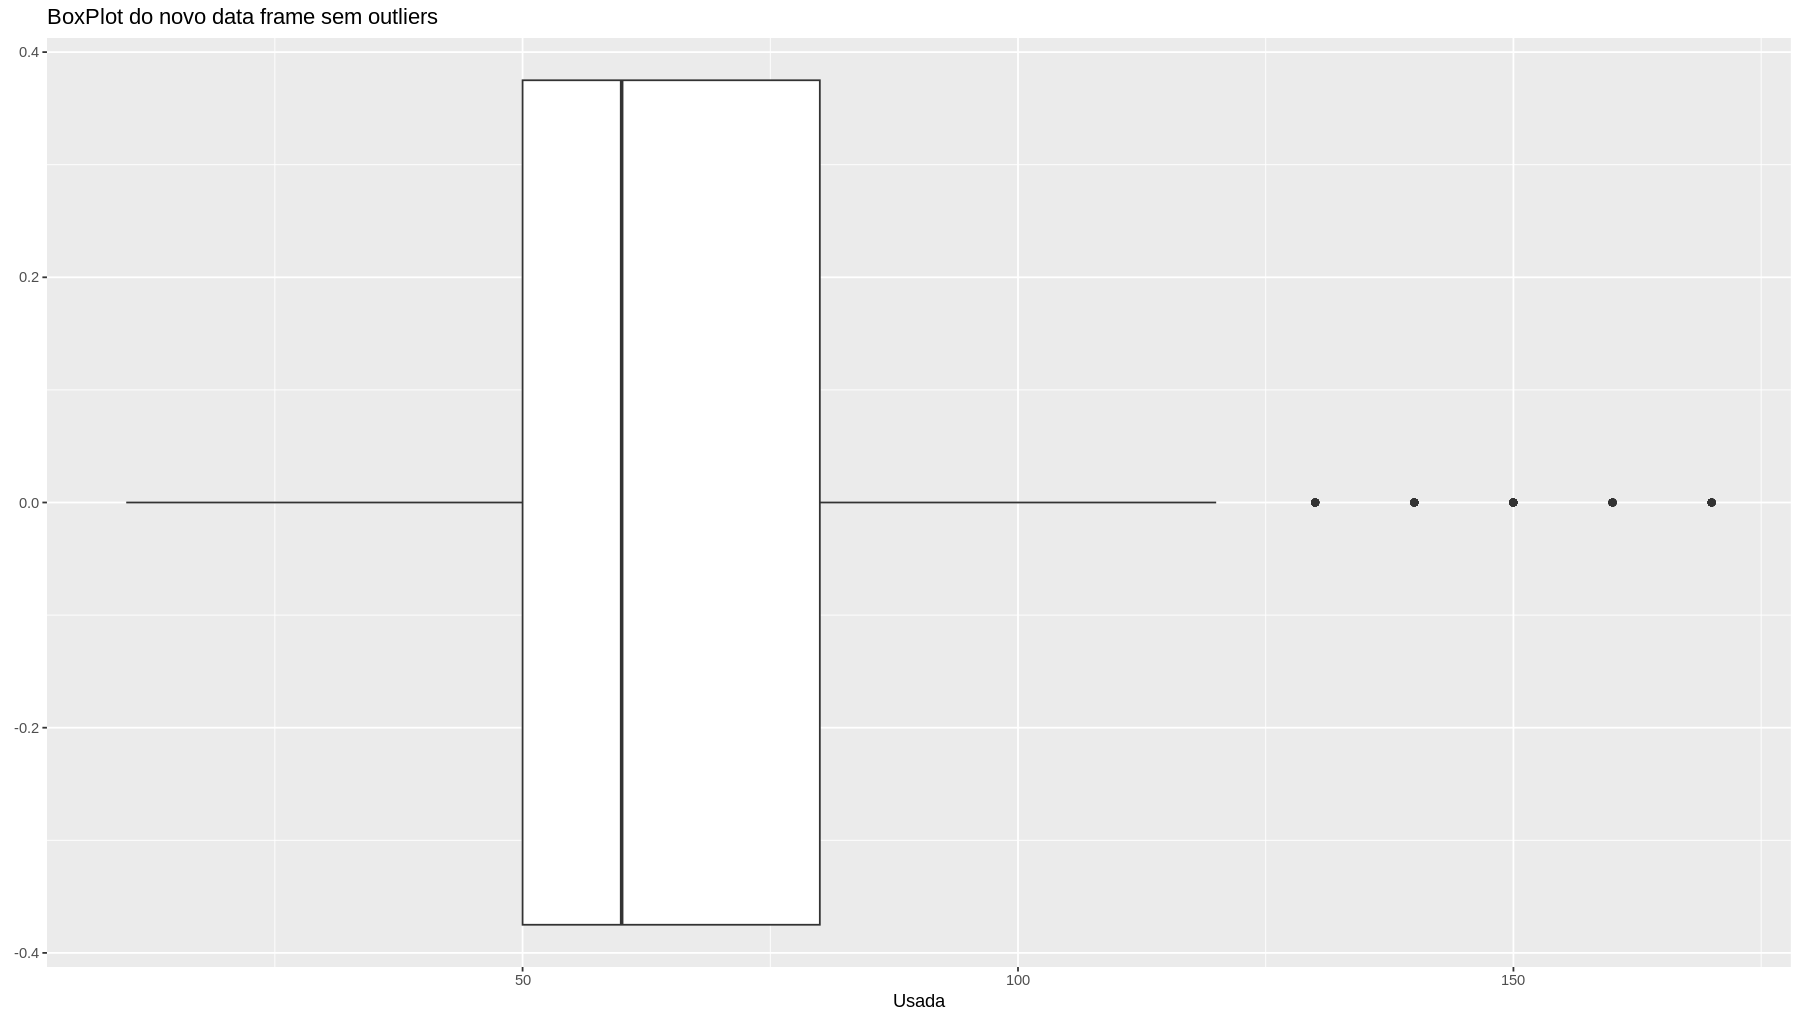

In [13]:
usadabox = ggplot(df, aes(y=Usada))
usadabox + geom_boxplot() + coord_flip() + labs(title="BoxPlot do novo data frame sem outliers")

Verificando a distribuição dos dados com histograma


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


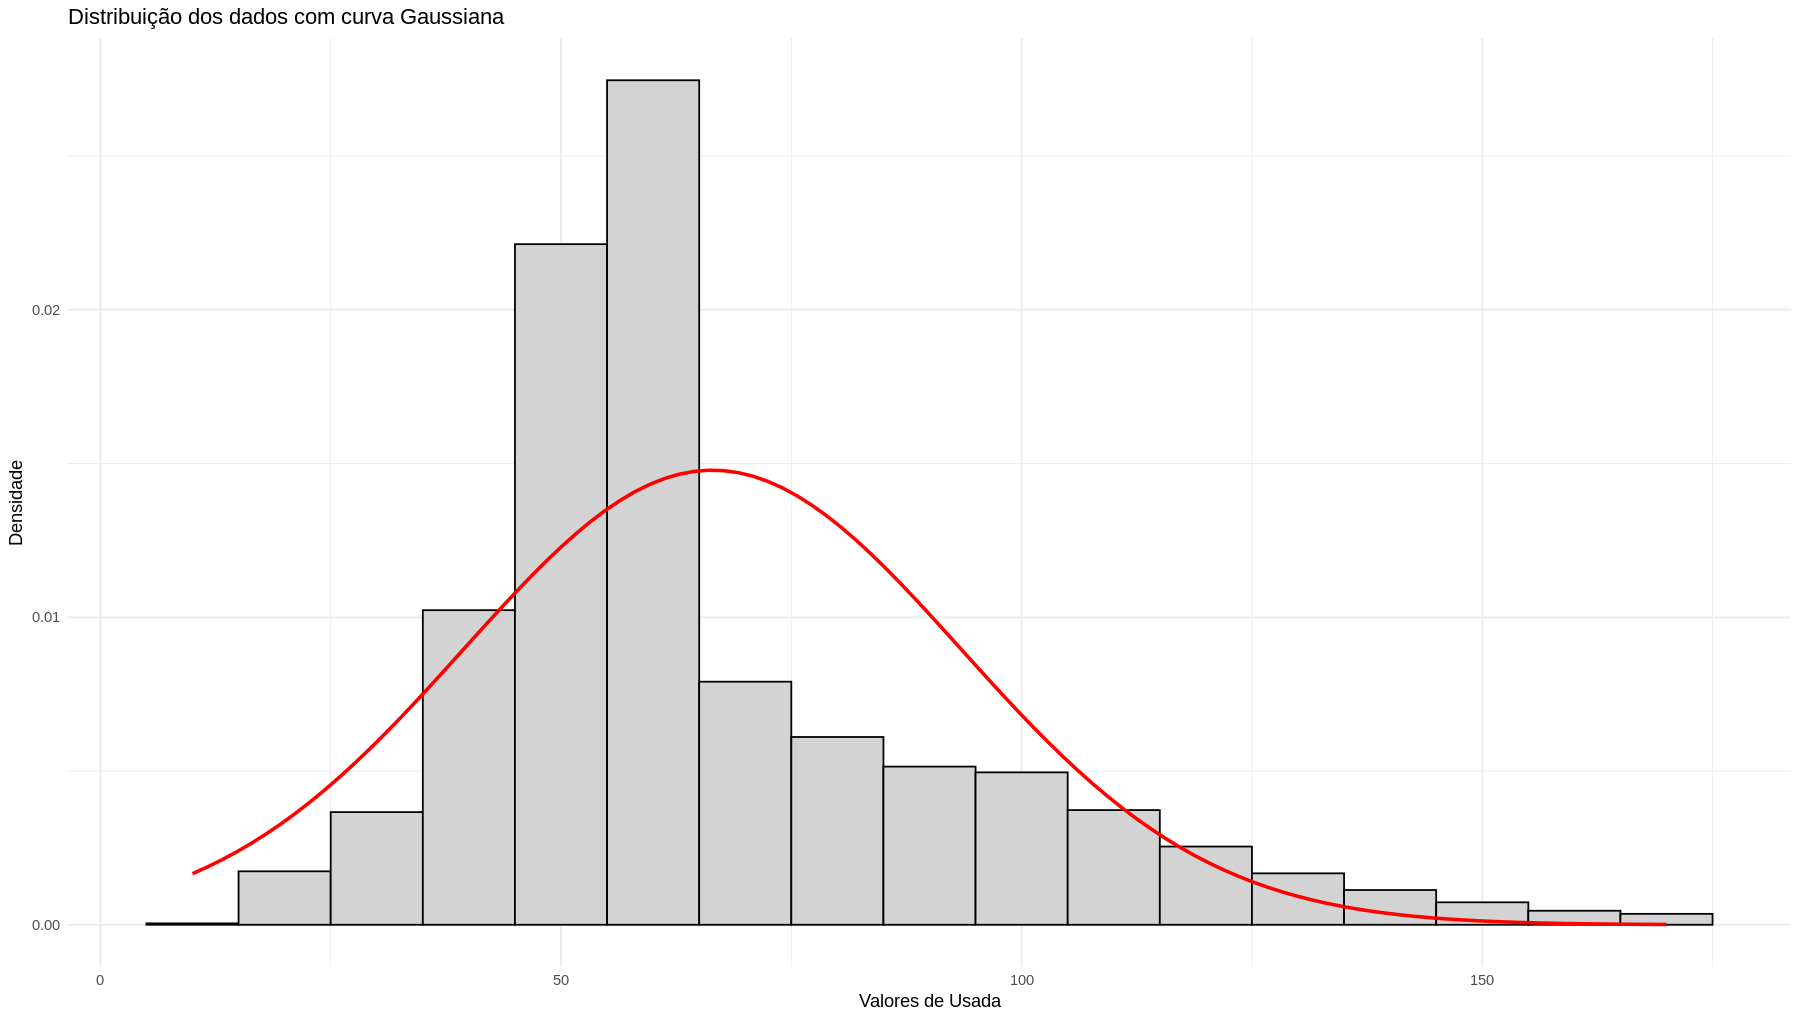

In [14]:
usadahist = ggplot(df, aes(x=Usada))
usadahist + geom_histogram(aes(y=..density..), binwidth=10, color="black", fill="lightgray") +
  stat_function(fun= dnorm, args=list(mean = mean(df$Usada, na.rm=T), sd= sd(df$Usada, na.rm=T)), color="red", size=1) +
  labs(title="Distribuição dos dados com curva Gaussiana", x="Valores de Usada", y="Densidade") +
  theme_minimal()

Criando o último gráfico, o modelo de regressão linear


Call:
lm(formula = Usada ~ Data, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.392 -17.528  -7.797  10.321 109.641 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.446e+03  8.125e+01  -17.80   <2e-16 ***
Data         8.961e-02  4.814e-03   18.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 26.75 on 19733 degrees of freedom
Multiple R-squared:  0.01726,	Adjusted R-squared:  0.01721 
F-statistic: 346.6 on 1 and 19733 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


[1] "Não existe nenhuma relação nos dados de consumo da coluna Usada em relação a coluna Data, os dias não estão interferindo basicamente no consumo de energia!"

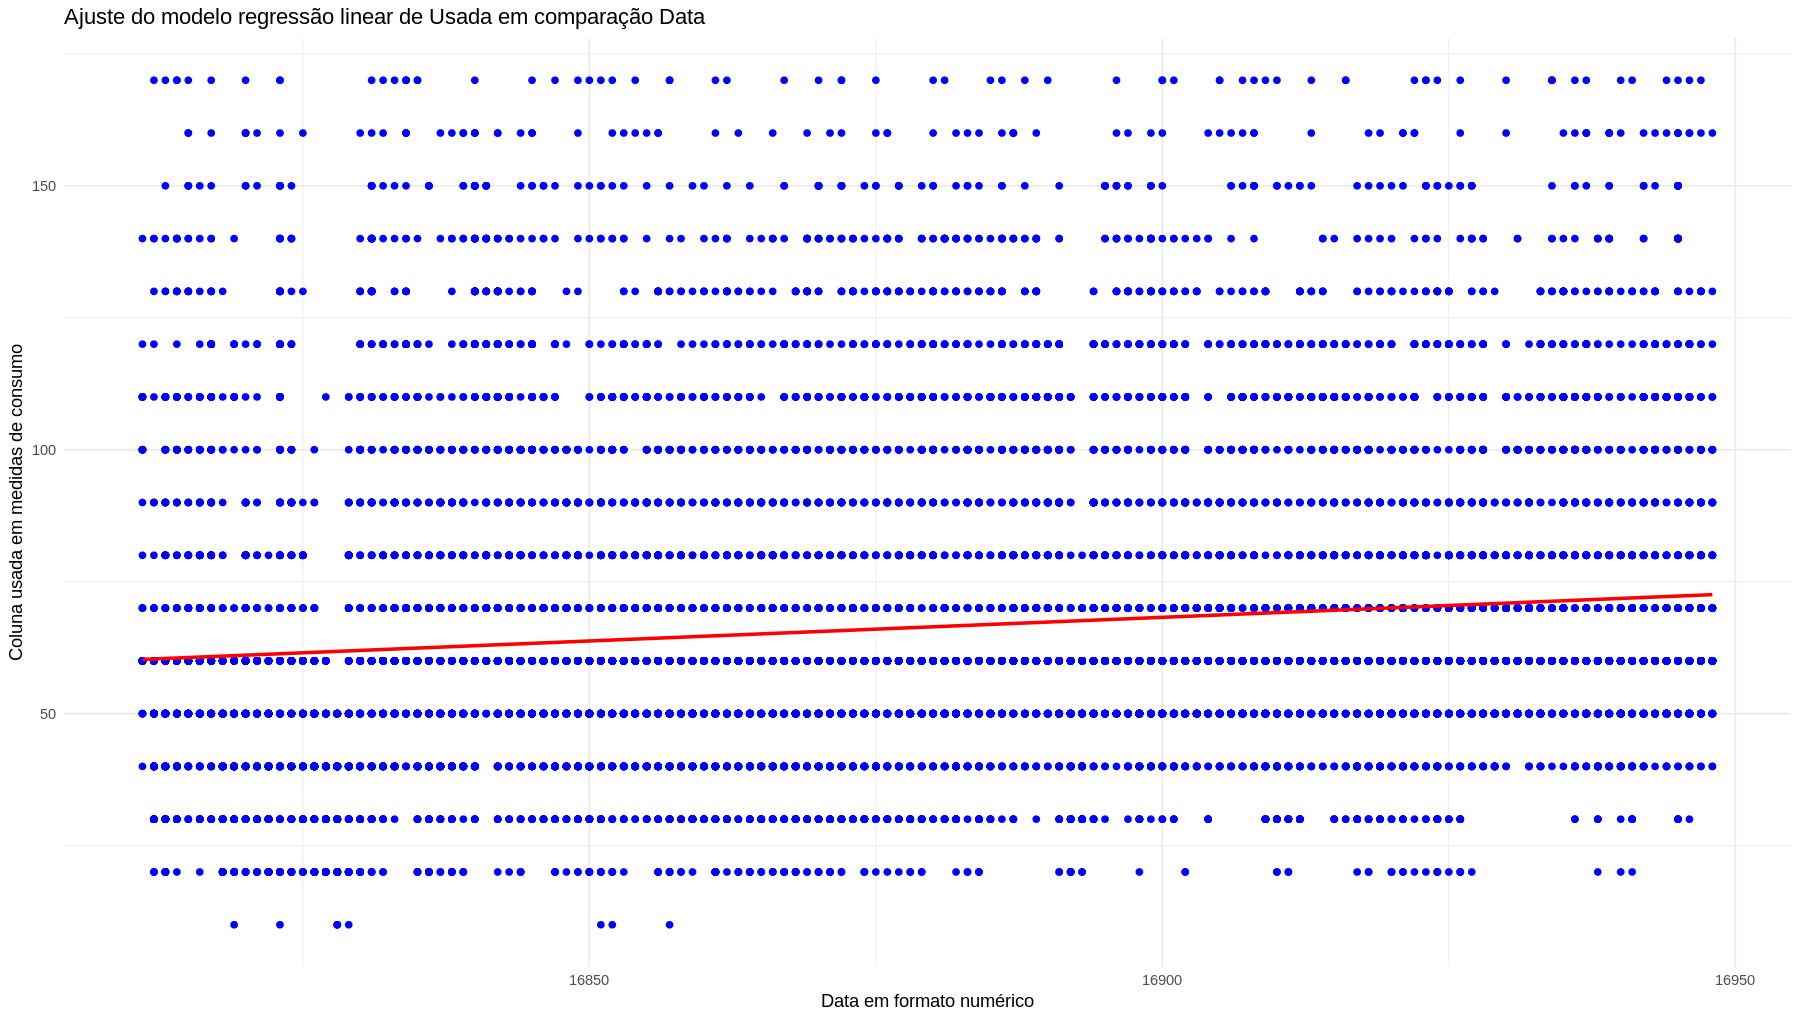

In [15]:
#Convertendo a coluna data em um formato numérico
df$Data = as.numeric(as.Date(df$Data, format="%Y-%m-%d"))

#Criando o modelo de regressão linear
modelo_usada = lm(Usada ~ Data, data=df)

#Visualizando o resumo do modelo
summary(modelo_usada)

#Plotando o gráfico de regressão linear
usada_regressao = ggplot(df, aes(x=Data, y=Usada))
usada_regressao + geom_point(color="blue") +
  geom_smooth(method="lm", color="red", se=F) +
  labs(title="Ajuste do modelo regressão linear de Usada em comparação Data", x="Data em formato numérico", y="Coluna usada em medidas de consumo") +
  theme_minimal()

"Não existe nenhuma relação nos dados de consumo da coluna Usada em relação a coluna Data, os dias não estão interferindo basicamente no consumo de energia!"

Normalizando os dados com mínimo e máximo

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2500  0.3125  0.3527  0.4375  1.0000 

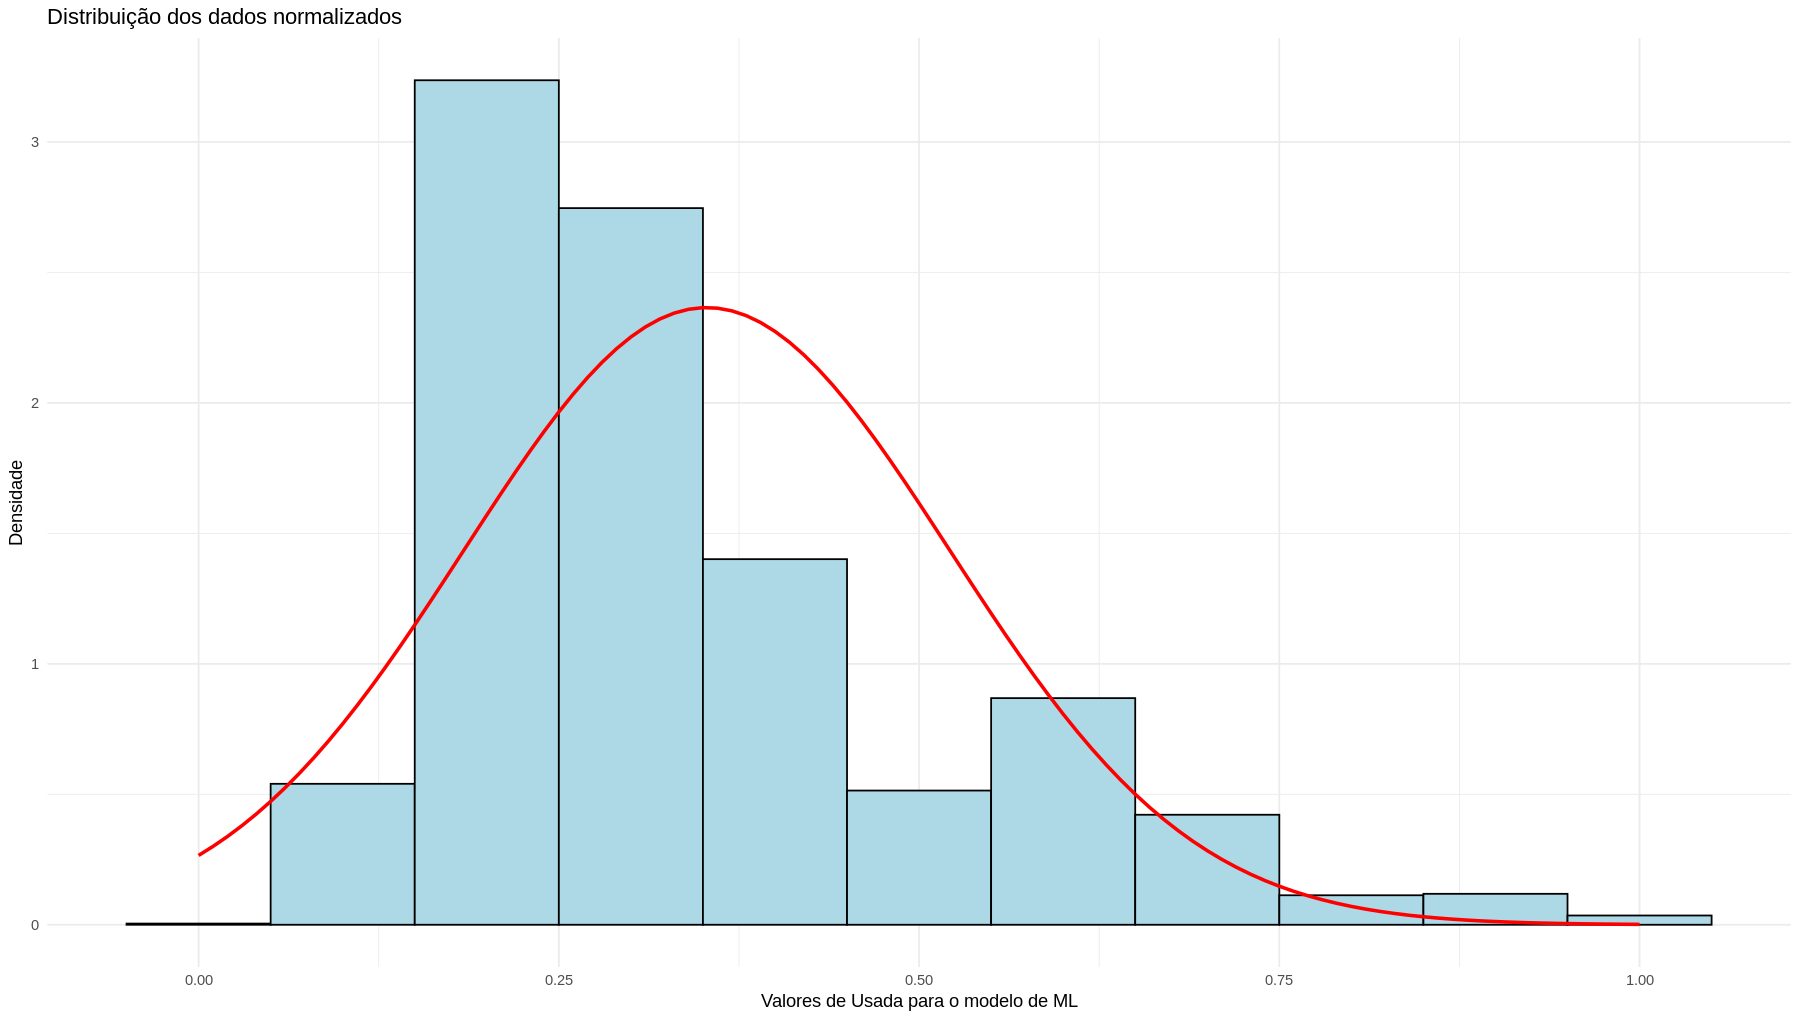

In [16]:
df$Usada = (df$Usada - min(df$Usada)) / (max(df$Usada - min(df$Usada)))

#Padronizando com Z-score
media_usada = mean(df$Usada)
desvio_usada = sd(df$Usada)

usada_z_score = (df$Usada - media_usada) / desvio_usada

#Visualizando a distribuição dos dados
summary(df$Usada)

#Plotando um histograma para verificar a distribuição dos dados
histnormalizada = ggplot(df, aes(x=Usada)) +
  geom_histogram(aes(y=..density..), binwidth=0.1, bins=20, color="black", fill="lightblue") +
  stat_function(fun=dnorm, args=list(mean = mean(df$Usada, na.rm=T), sd = sd(df$Usada, na.rm=T)), color="red", size=1) +
  labs(title="Distribuição dos dados normalizados", x="Valores de Usada para o modelo de ML", y="Densidade") +
  theme_minimal()

histnormalizada

Teste de normalidade com Anderson Darling

In [17]:
ad.test(df$Usada)

"Anderson-Darling normality test

data:  df$Usada
A = 854.96, p-value < 2.2e-16
"


	Anderson-Darling normality test

data:  df$Usada
A = 854.96, p-value < 2.2e-16


[1] "Anderson-Darling normality test\n\ndata:  df$Usada\nA = 854.96, p-value < 2.2e-16\n"

#Observações sobre o código da coluna Usada

1. Os dados não seguem uma distribuição normal, mas não há nada que interfira no modelo de machine learning, levando em conta que os dados seguem uma leve assimetria a esquerda.
2. Os dados foram normalizados o máximo possível, mais tentativas de normalização podem distorcer os dados e posteriormente o modelo de machine learning.
3. Os dados devido a estarem concentrados em torno da média e mediana, eles obtiveram uma grande concentração em torno de 0.25 após a normalização com IQR e mínimo-máximo, mas isso não é algo que vá interferir ou prejudicar no desenvolvimento do modelo de machine learning.
4. Após alguns testes e conclusão do tratamento da coluna Usada, posso partir para a próxima coluna.
5. Fiz um teste com um modelo de regressão linear na coluna Usada ~ Data, mas não há relação direta alguma entre ambas as variáveis, o fator dos dias não necessariamente está influenciando o consumo de energia.
6. Os dados estão flutuando basicamente em torno da mediana dos valores e foram removidos picos de outliers, dessa forma, acredito que não há mais o que fazer na coluna Usada para tratamento dos dados, mesmo não seguindo uma distribuição normal com forte variação dos dados e a normalidade.
7. Encerro o relatório da coluna Usada aqui.

#Tratamento da coluna Luzes para o cálculo de Machine Learning

10    20    30    40    50    60    70 
 2212 16876   559    77     9     1     1

[1] " Min. 1st Qu.  Median    Mean 3rd Qu.    Max.\n  10.00   20.00   20.00   19.26   20.00   70.00 "

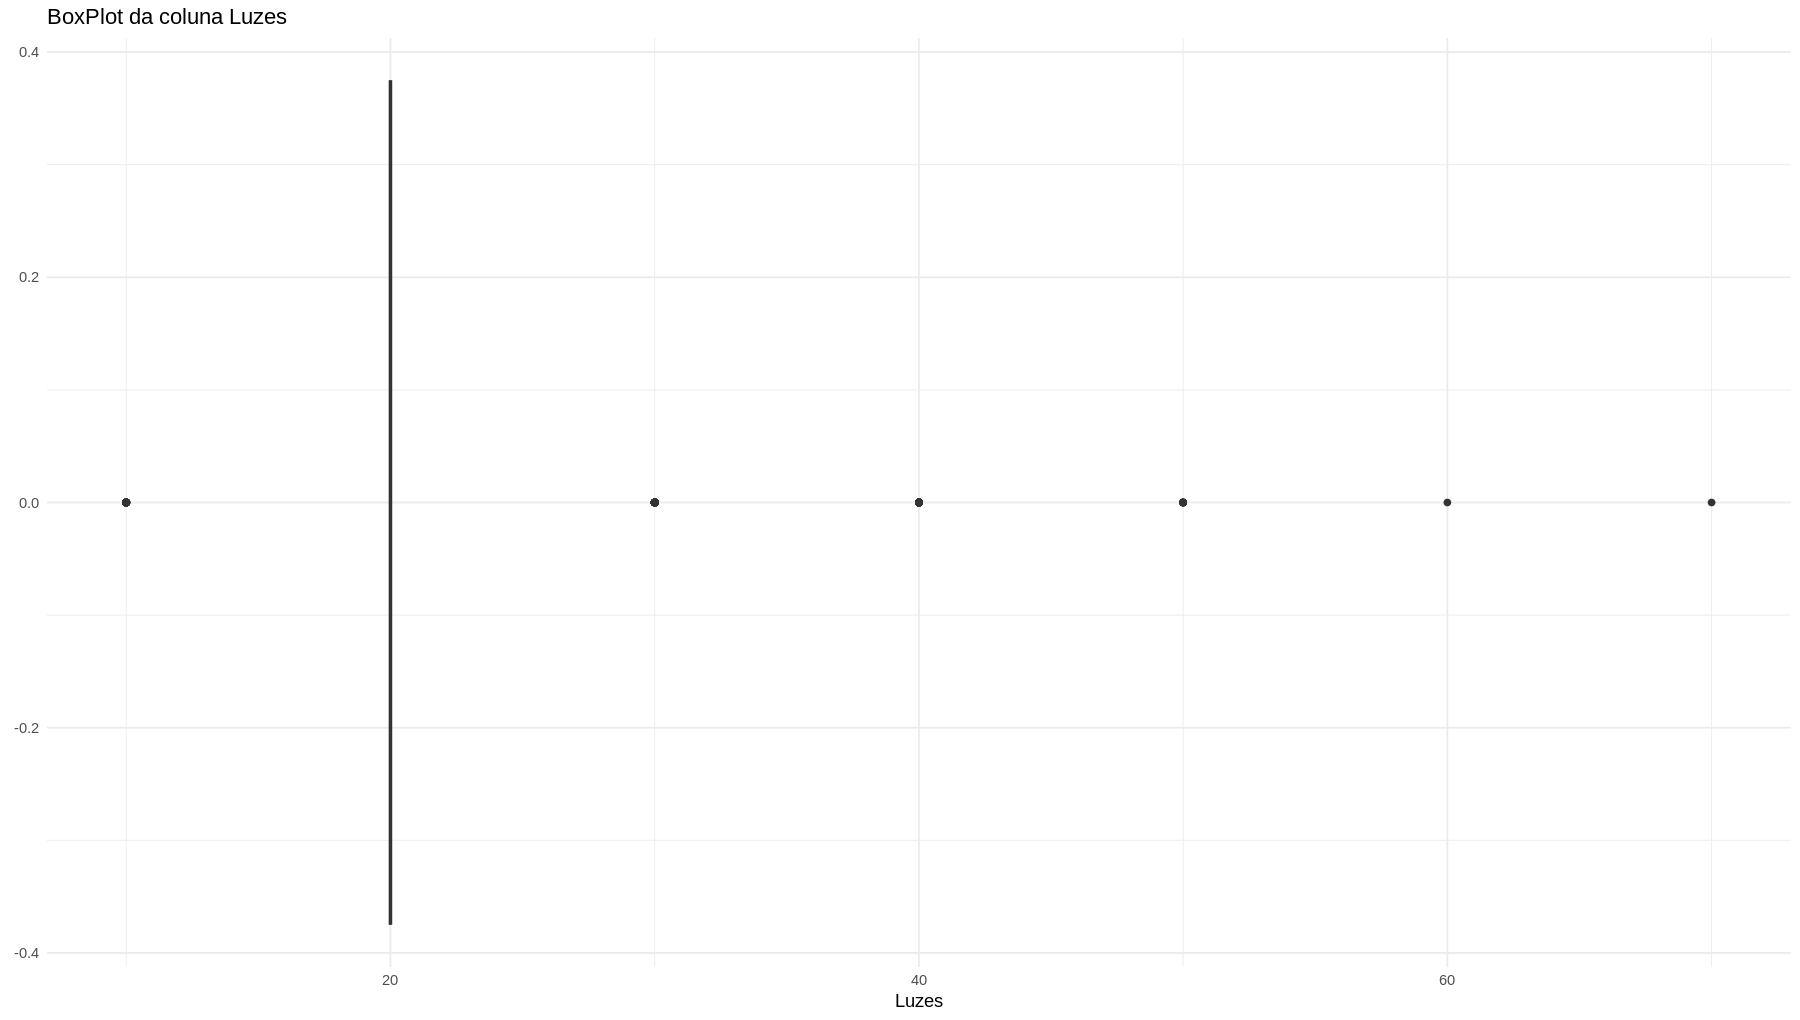

[1] "Estava notando que os gráficos ficaram muito estranhos, mas entendi agora o motivo:\n10: 2212, 20: 16876, 30: 559, 40: 77, 50: 9, 60: 1, 70: 1\nOs dados apresentam grande concentração em menores valores, porque como se trata de dados para predição de consumo de energia, normalmente as residências\nnão ultrapassam 20 luzes em um tamanho dentro do padrão no mercado, agora entendi, plotar esses gráficos não foram a melhor escolha, não havia\nme atentado a diferença de luzes nos dados, agora, mas os gráficos não estão errados, são alguns picos de outliers que acontecem mesmo.\nEssa coluna será uma coluna onde irei tratar mais com funções e comandos do que visualmente.\n"

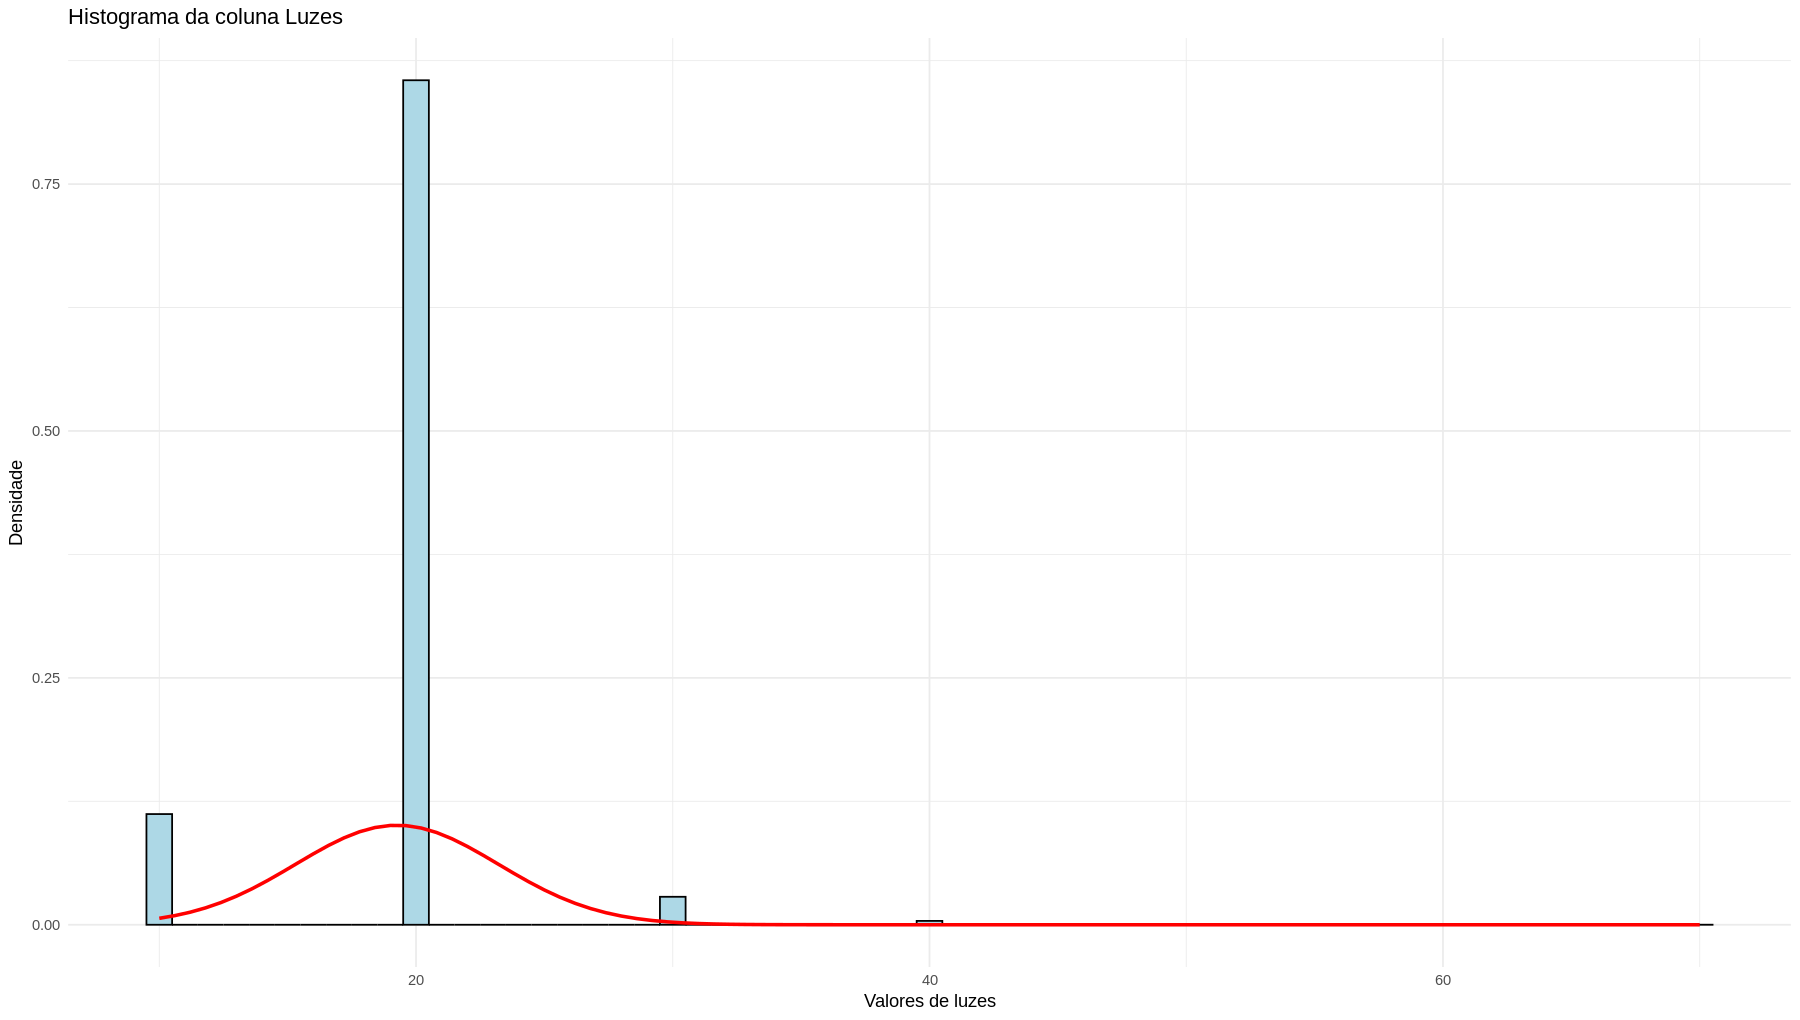

In [18]:
summary(as.factor(dados$Luzes))
" Min. 1st Qu.  Median    Mean 3rd Qu.    Max.
  10.00   20.00   20.00   19.26   20.00   70.00 "

#Plotando um gráfico boxplot da coluna Luzes
boxluzes = ggplot(dados, aes(y=Luzes)) + geom_boxplot() + coord_flip() + labs(title="BoxPlot da coluna Luzes") + theme_minimal()
boxluzes
#Após uma análise visual, pode ser interessante remover alguns picos de outliers devido ao tamanho padrão das residências, às vezes não terem 70 luzes

#Plotando um gráfico de histograma para entender a dispersão dos dados
histluzes = ggplot(dados, aes(x=Luzes)) +
  geom_histogram(aes(y=..density..), binwidth=1, bins=10, color="black", fill="lightblue") +
    stat_function(fun=dnorm, args=list(mean= mean(dados$Luzes, na.rm=T), sd= sd(dados$Luzes, na.rm=T)), color="red", size=1) +
    labs(title="Histograma da coluna Luzes", x="Valores de luzes", y="Densidade") + theme_minimal()
histluzes

"Estava notando que os gráficos ficaram muito estranhos, mas entendi agora o motivo:
10: 2212, 20: 16876, 30: 559, 40: 77, 50: 9, 60: 1, 70: 1
Os dados apresentam grande concentração em menores valores, porque como se trata de dados para predição de consumo de energia, normalmente as residências
não ultrapassam 20 luzes em um tamanho dentro do padrão no mercado, agora entendi, plotar esses gráficos não foram a melhor escolha, não havia
me atentado a diferença de luzes nos dados, agora, mas os gráficos não estão errados, são alguns picos de outliers que acontecem mesmo.
Essa coluna será uma coluna onde irei tratar mais com funções e comandos do que visualmente.
"

Normalizando os dados da coluna Luzes no data frame dados, o data frame original, continua...

In [ ]:
"
#Substituição dos valores de outliers da coluna Luzes
q1_luzes = quantile(dados$Luzes, 0.25) #Quartil 1
q3_luzes = quantile(dados$Luzes, 0.75) #Quartil 3
iqr_luzes = q3_luzes - q1_luzes

#Criando os limites superiores e inferiores
limite_inferior_luzes = q1_luzes - 1.5 * iqr_luzes
limite_superior_luzes = q3_luzes + 1.5 * iqr_luzes

#Substituindo os valores com picos de outliers
luzes_sem_outliers = dados$Luzes[dados$Luzes >= limite_inferior_luzes & dados$Luzes <= limite_superior_luzes]

#length(luzes_sem_outliers)
Retornou 16876 linhas

mediana_luzes_sem_outliers = median(luzes_sem_outliers)
mediana_luzes_sem_outliers
Retornou o valor 20

#Substituindo os valores dos limites por NA
df$Luzes = ifelse (dados$Luzes >= limite_inferior_luzes & dados$Luzes <= limite_superior_luzes, dados$Luzes, NA)

#Preenchendo os valores de NAs na coluna Usada
df$Luzes[is.na(df$Luzes)] = mediana_luzes_sem_outliers

#Verificando o resultado
summary(df$Luzes)"

Eu havia substituido os valores da coluna Luzes pela mediana, mas pensando bem, isso não é uma boa aplicação, vou listar os motivos:

1. Residências não necessariamente possuem o mesmo número de lâmpadas, o que cada residência se torna única e a quantidade de lâmpadas, podem influenciar o consumo de energia de acordo com outras variáveis.
2. Você ter uma casa grande em momentos do verão, com mais aparelhos para esfriar o ambiente, pode influenciar o consumo de energia e vice-versa para o inverno.
3. Após analisar na prática, substituir todos os valores pela mediana que estejam fora de um quartil ou não, não condiz com a realidade que pretendo aplicar no modelo de Machine Learning, portanto, decidi desfazer abaixo o que fiz com os cálculos de IQR e limites, o máximo que vou tentar fazer é normalizar os dados com mínimo-máximo e padronizar com Z-Score.
4. Os dados de luzes na residência não seguem um padrão uniforme ou uma distribuição uniforme, os dados estão muito concentrados em torno de 10 e 30, o que apresenta que imóveis com 70 lâmpadas, podem ser um imóvel comercial ou industrial, portanto, ele teria um consumo muito maior.
5. Eu substituindo esses dados, o modelo não se tornaria generalista, podendo se sair bem com previsões de dados de qualquer tamanho, dessa forma decidi avaliar o modelo mantendo luzes no padrão original.
6. Dados normalizados e padronizados com Z-Score irão tornar a análise do modelo de ML melhor por estarem em dados fáceis dele ler e usar, mas nem tudo precisa ser modificado, a lição obtida aqui foi essa.



In [20]:
#Revertendo a substituição da coluna Luzes no novo data frame (df) que é uma cópia do data frame original (dados) para os valores originais
df$Luzes = dados$Luzes

#Verificando se foi bem sucedido
summary(df$Luzes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   20.00   20.00   19.26   20.00   70.00 

Normalizando e padronizando os dados

In [21]:
#Normalizando os dados com mínimo-máximo
df$Luzes = (df$Luzes - min(df$Luzes)) / (max(df$Luzes - min(df$Luzes)))

#Padronizando com Z-Score
media_luzes = mean(df$Luzes)
desvio_luzes = sd(df$Luzes)

luzes_z_score = (df$Luzes - media_luzes) / desvio_luzes

summary(df$Luzes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1667  0.1667  0.1543  0.1667  1.0000 

#Tratamento e processamento dos dados da coluna TempCoz

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.79   20.76   21.60   21.69   22.60   26.26 

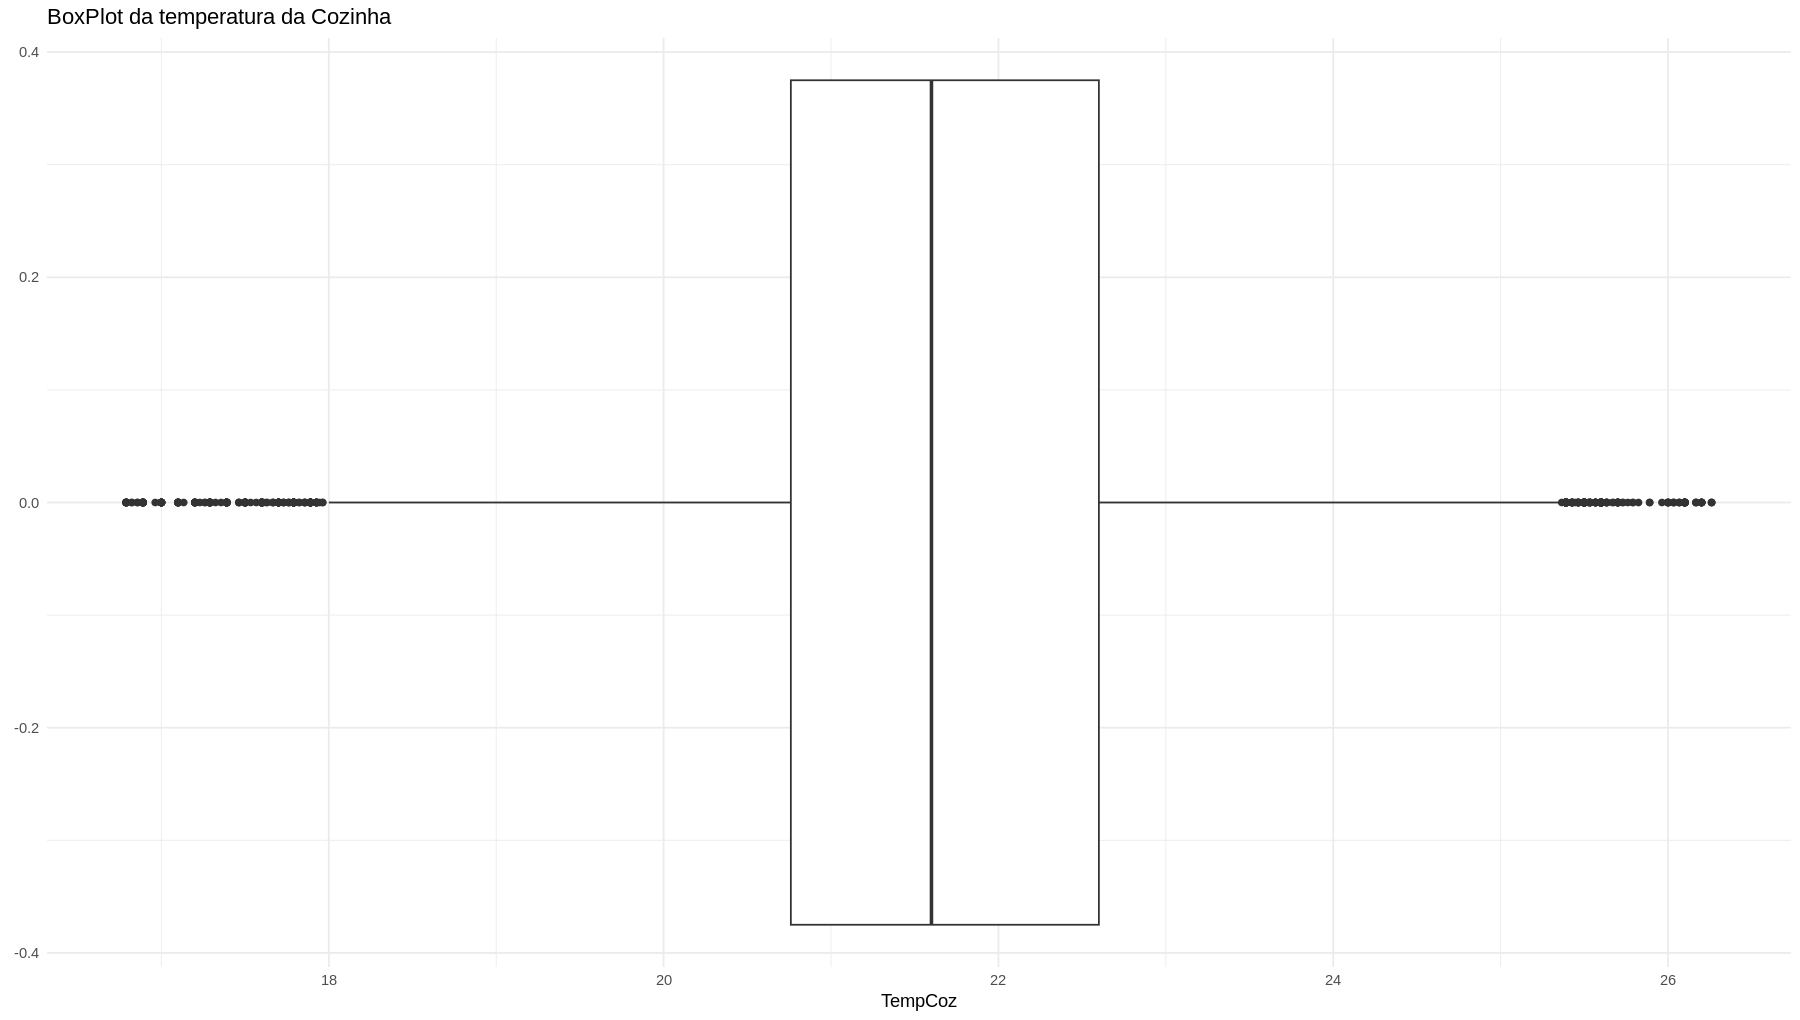

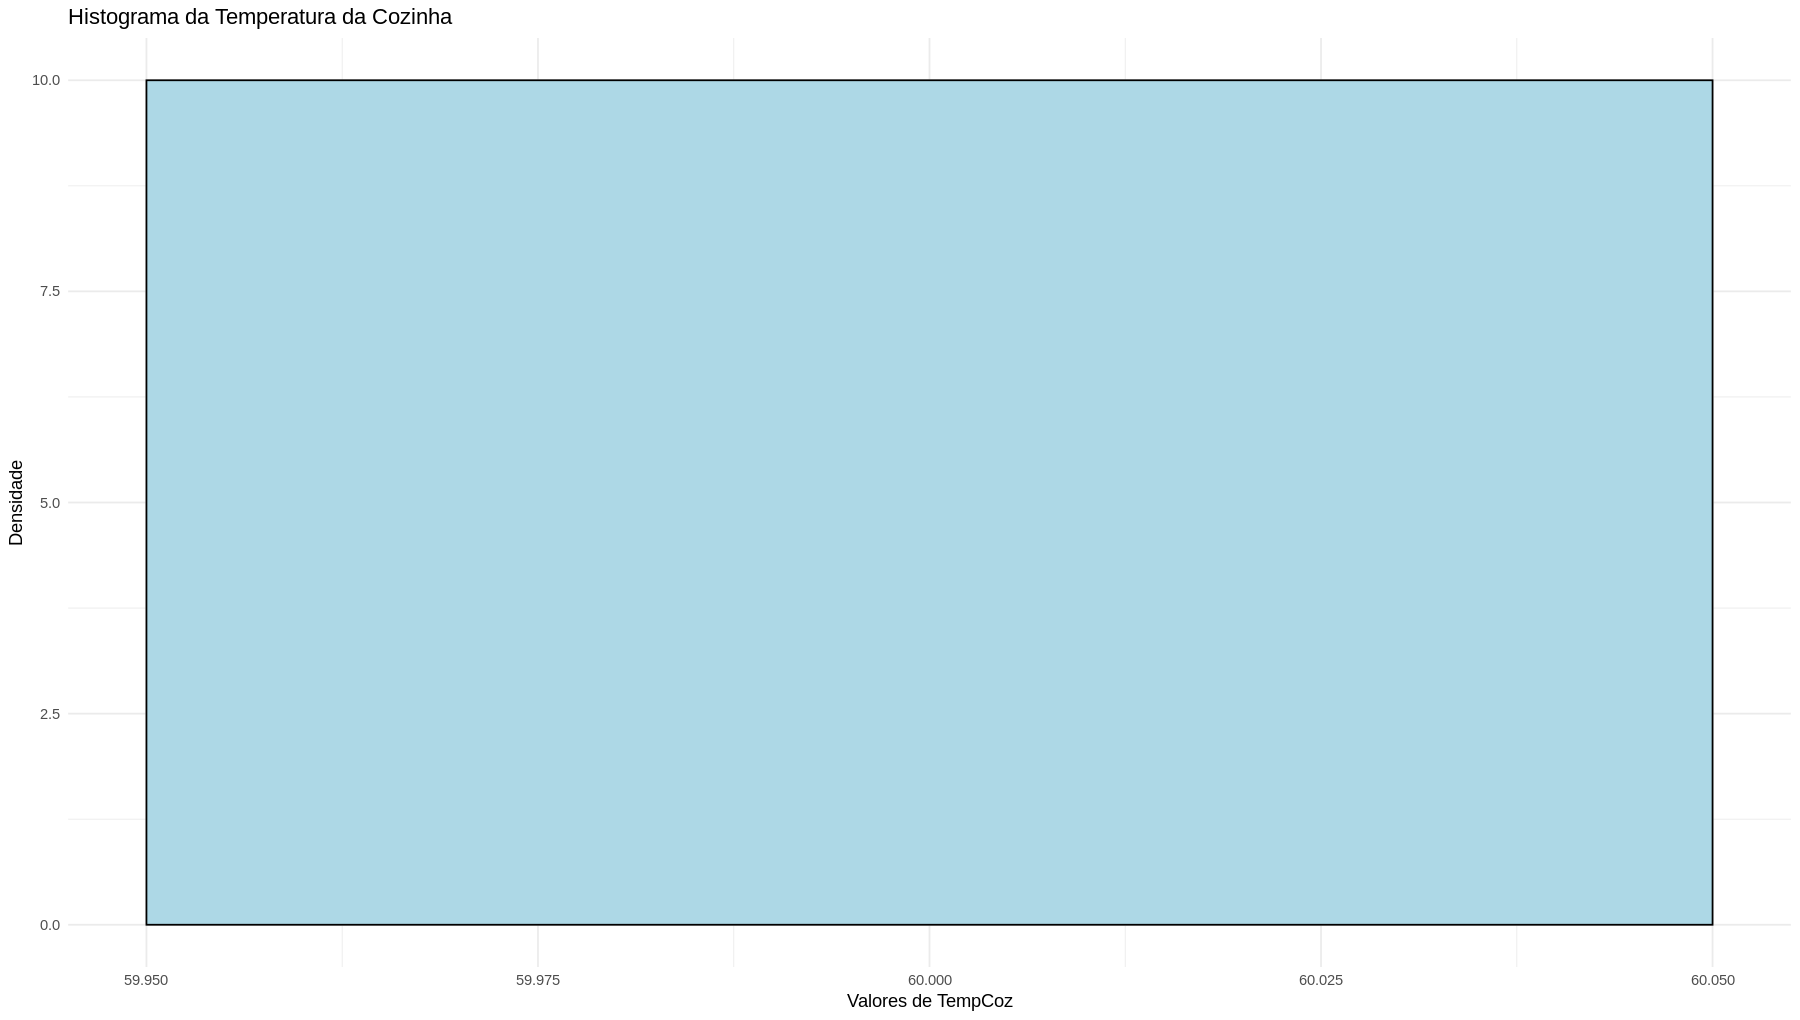

In [50]:
summary(dados$TempCoz)

#Plotando um gráfico boxplot da TempCoz
boxcozinha = ggplot(dados, aes(y=TempCoz)) +
  geom_boxplot() + coord_flip() + labs(title="BoxPlot da temperatura da Cozinha") + theme_minimal()
boxcozinha

#Plotando um gráfico de histograma da coluna TemCoz
histcozinha = ggplot(df, aes(x=TempCoz)) +
  geom_histogram(aes(y=..density..), bins=100, color="black", fill="lightblue") +
  stat_function(fun=dnorm, args=list(mean = mean(df$TempCoz, na.rm=T), sd = sd(df$TempCoz, na.rm=T)), color="red", size=1) +
  labs(title="Histograma da Temperatura da Cozinha", x="Valores de TempCoz", y="Densidade") +
  theme_minimal()
histcozinha

Removendo os valores de outliers da coluna TempCoz

1. Diferente da coluna Luzes, aqui sim seria uma boa estratégia remover os picos de Outliers da coluna, para uma melhor interpretação do modelo, já que cozinhas industrais tendem a serem mais quentes que as cozinhas domésticas.
2. Nem todo mundo cozinha muito na cozinha, o que o calor das panelas e do fogão pode influenciar a temperatura do ambiente, às vezes, nas casas modernas, é usado com mais frequência o microondas do que o fogão.
3. Vou testar duas estratégias aqui:
  *   1º A remoção de outliers por duas vezes o desvio padrão acima da média.
  *   se não for bom, vou partir
  *   2º A remoção por Q1 e Q3 e IQR




  
  

In [52]:
#Criando as variáveis necessárias
cozinha_media = mean(df$TempCoz)
cozinha_desvio = sd(df$TempCoz)

cozinha_limite_inferior = cozinha_media - (2 * cozinha_desvio)
cozinha_limite_superior = cozinha_media + (2 * cozinha_desvio)

summary(df$TempCoz)

#Buscando os outliers da coluna
outliers_cozinha = df$TempCoz[df$TempCoz < cozinha_limite_inferior | df$TempCoz > cozinha_limite_superior]

#Criando a variável que armazena os dados da temperatura da cozinha sem outliers
cozinha_sem_outliers = df$TempCoz[df$TempCoz < cozinha_limite_inferior & df$TempCoz > cozinha_limite_superior]

#Criando a variável da mediana
media_cozinha_sem_outliers = mean(df$TempCoz)

summary(df$TempCoz)
"
#Substituindo os valores de outliers no df$TempCoz
df$TempCoz = ifelse (dados$TempCoz < cozinha_limite_inferior & dados$TempCoz > cozinha_limite_superior, dados$TempCoz, NA)

#Preenchendo os valores de NAs na coluna Usada
df$TempCoz[is.na(df$TempCoz)] = media_cozinha_sem_outliers

#Verificando o resultado
summary(df$TempCoz)

summary(cozinha_sem_outliers)
"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     60      60      60      60      60      60 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     60      60      60      60      60      60 

[1] "\n#Substituindo os valores de outliers no df$TempCoz\ndf$TempCoz = ifelse (dados$TempCoz < cozinha_limite_inferior & dados$TempCoz > cozinha_limite_superior, dados$TempCoz, NA)\n\n#Preenchendo os valores de NAs na coluna Usada\ndf$TempCoz[is.na(df$TempCoz)] = media_cozinha_sem_outliers\n\n#Verificando o resultado\nsummary(df$TempCoz)\n\nsummary(cozinha_sem_outliers)\n"

15/03 parei de fazer o projeto aqui, observações até o momento:

1. O cálculo de IQR, Q1 e Q3 é uma boa abordagem tanto quanto o processo de media - ou + (2 * desvio).
2. Não necessariamente os dados devem estar todos normalizados ou padronizados, não existe perfeição no mundo real, o ideal são os dados estarem o mais próximo possível de 0 e 1.
3. Não preciso ser uma biblioteca ambulante, o copilot e o google estão para qualquer dúvida em relação a comandos ou bibliotecas.
4. O importante é conhecer o fundamento, nesse caso, estatística e probabilidade para o modelo de Machine Learning.
5. As ferramentas, nesse caso, R e pacotes se tornam familiares conforme a prática, experiência e evolução ao longo dos anos.
6. Para um bom modelo de machine learning, seja em redes neurais, random forest, ou qualquer outro modelo, o importante é que os dados estejam agrupados entre 0 e 1, alguns modelos podem se dar melhor com dados normalizados, outros não, mas o importante é o senso de análise crítico voltado ao mercado real.
7. Estou decidindo ainda, mas pretendo utilizar modelos de regressão linear para encontrar a melhor variável independente para a variável dependente que seria o consumo de energia aqui, após isso, pretendo aplicar um modelo de redes neurais e prophet para previsão dos dados.
8. No contexto de estatística aqui, meus conhecimentos intermediários me ajudaram aqui, tirei poucas dúvidas na internet até o momento, foi mais uma dúvida ou outra sobre como fazer comandos no R, após finalizar esse projeto, pretendo fazer um por vez, um em R, outro em Python e assim por diante.
9. Hoje entendo que para o modelo de machine learning ser bom o suficiente para prever dados, ele precisa ter bons dados tratados no inicio do processo de ciência de dados.


Normalizando e padronizando os dados da Temperatua da Cozinha

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.4192  0.5079  0.5171  0.6135  1.0000 

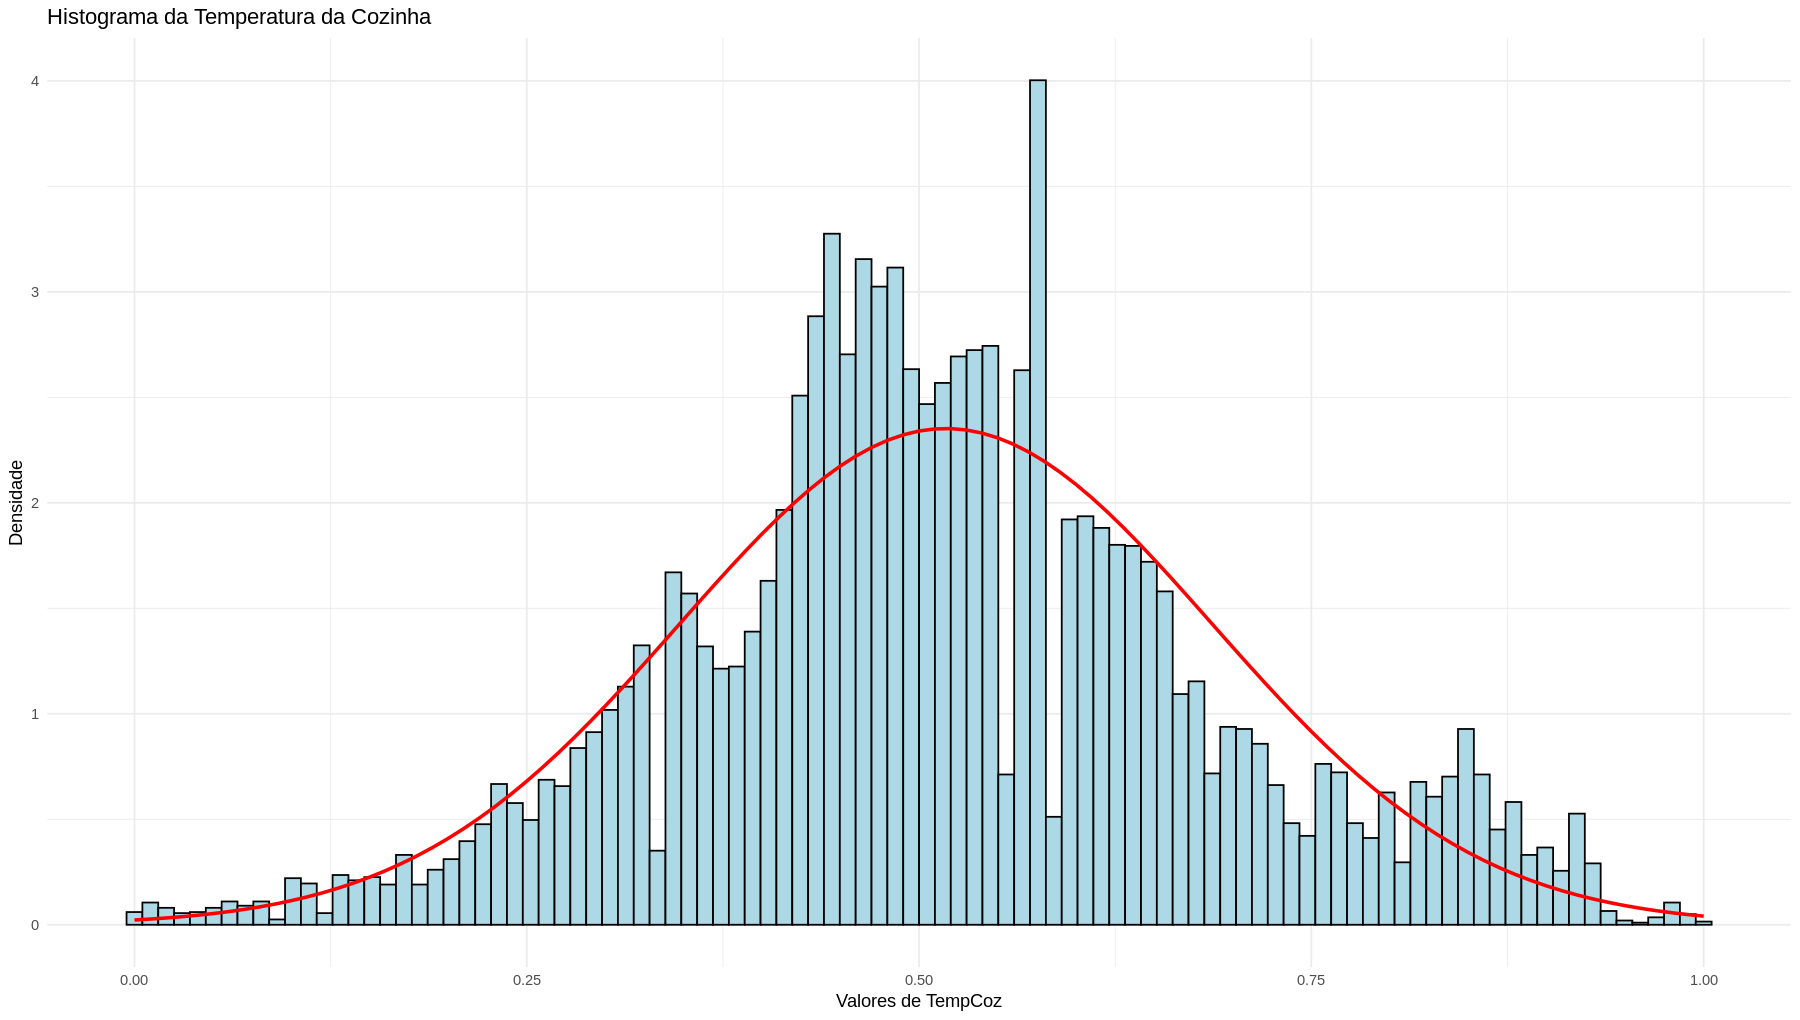

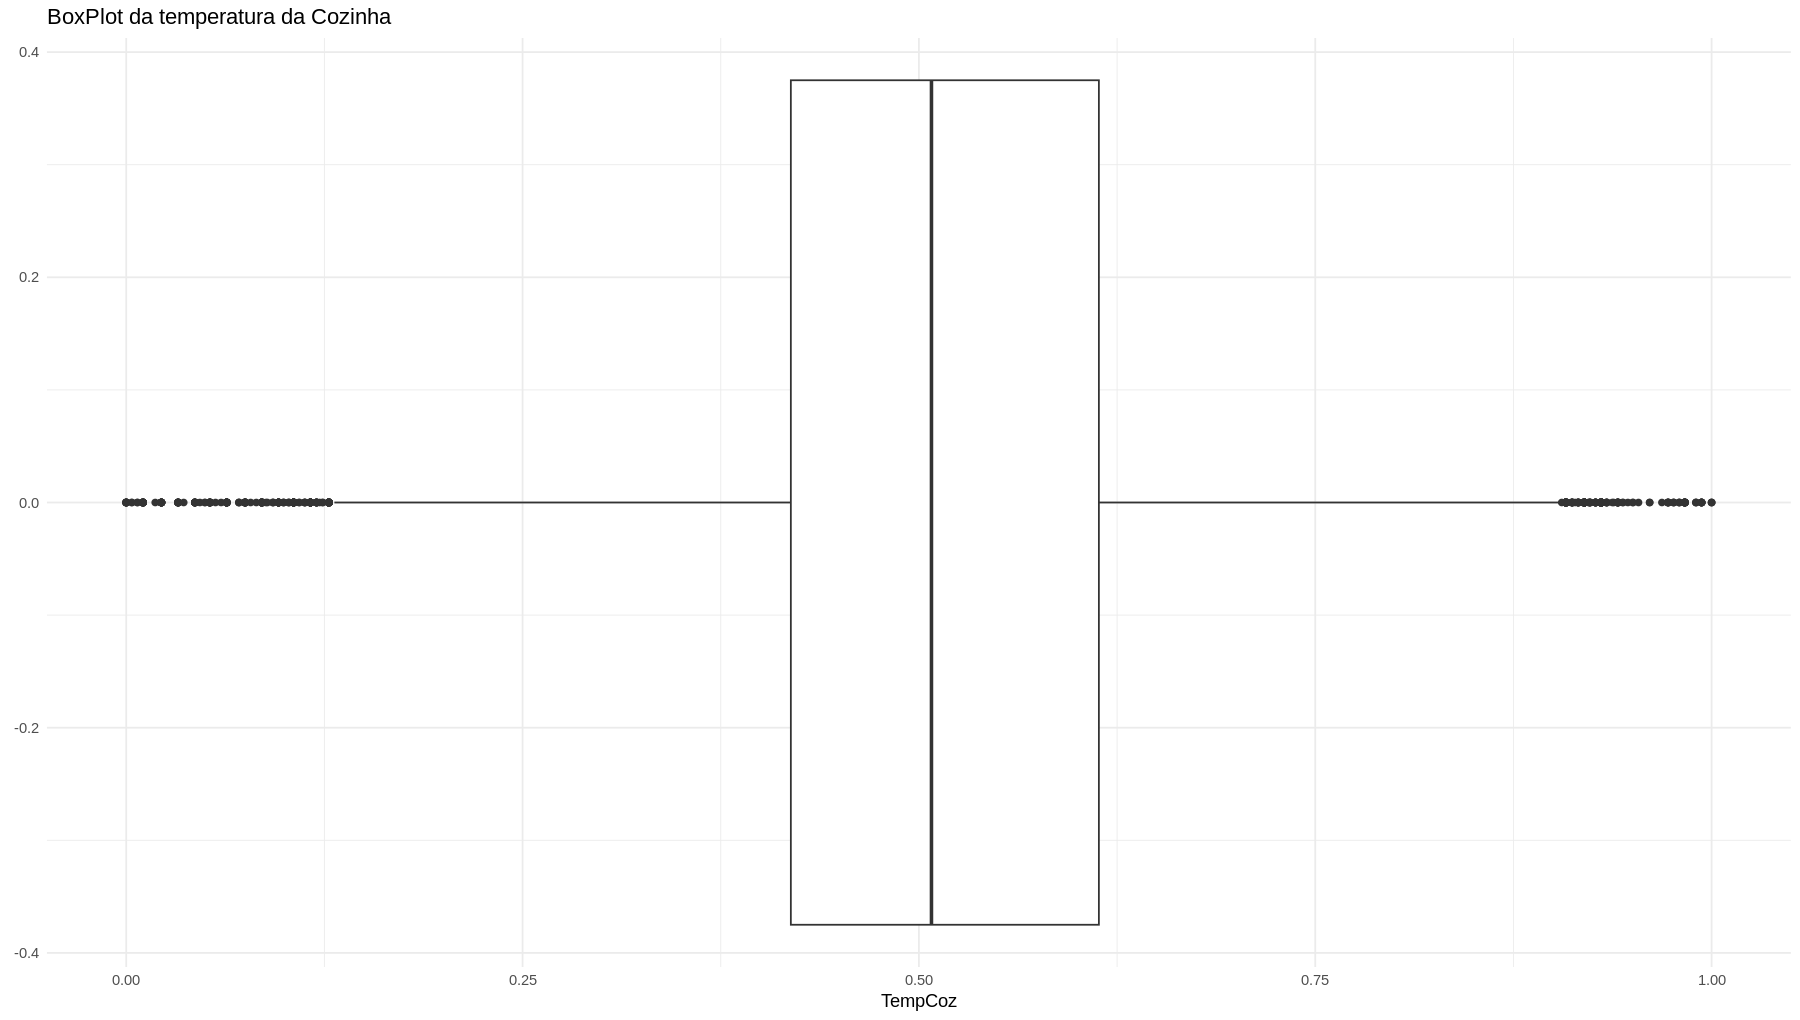

In [24]:
#Normalizando os dados da coluna TempCoz com mínimo-máximo
df$TempCoz = (df$TempCoz - min(df$TempCoz)) / (max(df$TempCoz - min(df$TempCoz)))

#Padronizando com Z-Score
media_cozinha = mean(df$TempCoz)
desvio_cozinha = sd(df$TempCoz)

cozinha_z_score = (df$TempCoz - media_cozinha) / desvio_cozinha

summary(df$TempCoz)

#Plotando um gráfico de histograma da coluna TemCoz
histcozinha = ggplot(df, aes(x=TempCoz)) +
  geom_histogram(aes(y=..density..), bins=100, color="black", fill="lightblue") +
  stat_function(fun=dnorm, args=list(mean = mean(df$TempCoz, na.rm=T), sd = sd(df$TempCoz, na.rm=T)), color="red", size=1) +
  labs(title="Histograma da Temperatura da Cozinha", x="Valores de TempCoz", y="Densidade") +
  theme_minimal()
histcozinha

#Plotando um gráfico boxplot da TempCoz
boxcozinha = ggplot(df, aes(y=TempCoz)) +
  geom_boxplot() + coord_flip() + labs(title="BoxPlot da temperatura da Cozinha") + theme_minimal()
boxcozinha

Fazendo o tratamento da coluna Umidade Cozinha

In [25]:
summary(df$UmiCoz)

#Criando as variávies de remoção de outliers por 2 * desvio padrão
umidade_cozinha_media = mean(df$UmiCoz)
umidade_cozinha_desvio = sd(df$UmiCoz)

#Criando os intervalos de 2 * o desvio padrão
umidade_cozinha_limite_inferior = umidade_cozinha_media - (2 * umidade_cozinha_desvio)
umidade_cozinha_limite_superior = umidade_cozinha_media + (2 * umidade_cozinha_desvio)

#Buscando os outliers da coluna
outliers_umidade_cozinha = df$UmiCoz[df$UmiCoz < umidade_cozinha_limite_inferior | df$UmiCoz > umidade_cozinha_limite_superior]

#Criando a variável que armazena os dados da temperatura da cozinha sem outliers
umidade_cozinha_sem_outliers = df$UmiCoz[df$UmiCoz >= umidade_cozinha_limite_inferior & df$UmiCoz <= umidade_cozinha_limite_superior]

summary(umidade_cozinha_sem_outliers)

#Normalizando os dados da coluna TempCoz com mínimo-máximo
df$UmiCoz = (df$UmiCoz - min(df$UmiCoz)) / (max(df$UmiCoz - min(df$UmiCoz)))

#Padronizando com Z-Score
umidade_media_cozinha = mean(df$UmiCoz)
umidade_desvio_cozinha = sd(df$UmiCoz)

cozinha_z_score = (df$UmiCoz - umidade_media_cozinha) / umidade_desvio_cozinha

summary(df$UmiCoz)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  27.02   37.33   39.66   40.26   43.07   63.36 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.33   37.33   39.56   40.04   42.70   48.22 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2837  0.3477  0.3643  0.4415  1.0000 

In [ ]:
#Verificando a presença de valores 0 (zero) no data frame
colunascomzero_df = sapply(df, function(col) any(col == 0))
colunascomzero_df

#Retornando o nome das colunas com zero
colunanomescomzero_df = names(colunascomzero[colunascomzero])
colunanomescomzero_df

"Retornou as colunas Usada, Luzes, TempCoz, UmiCoz"
#Toda coluna que eu normalizar, irá criar zeros e eu devo substituir pela mediana os valores de zero

Após uma pesquisa, descobri que os zeros e uns criados pela normalização de mínimo-máximo e padronização com Z-score não necessariamente são algo ruim para o modelo de previsão, decidi por mante-los. Pois os dados representam outliers padrão dos dados, não havendo necessidade de substituição pela mediana, pois isso pode alterar o aprendizado de máquina e prejudicar o aprendizado de padrões pelo modelo de Machine Learning.

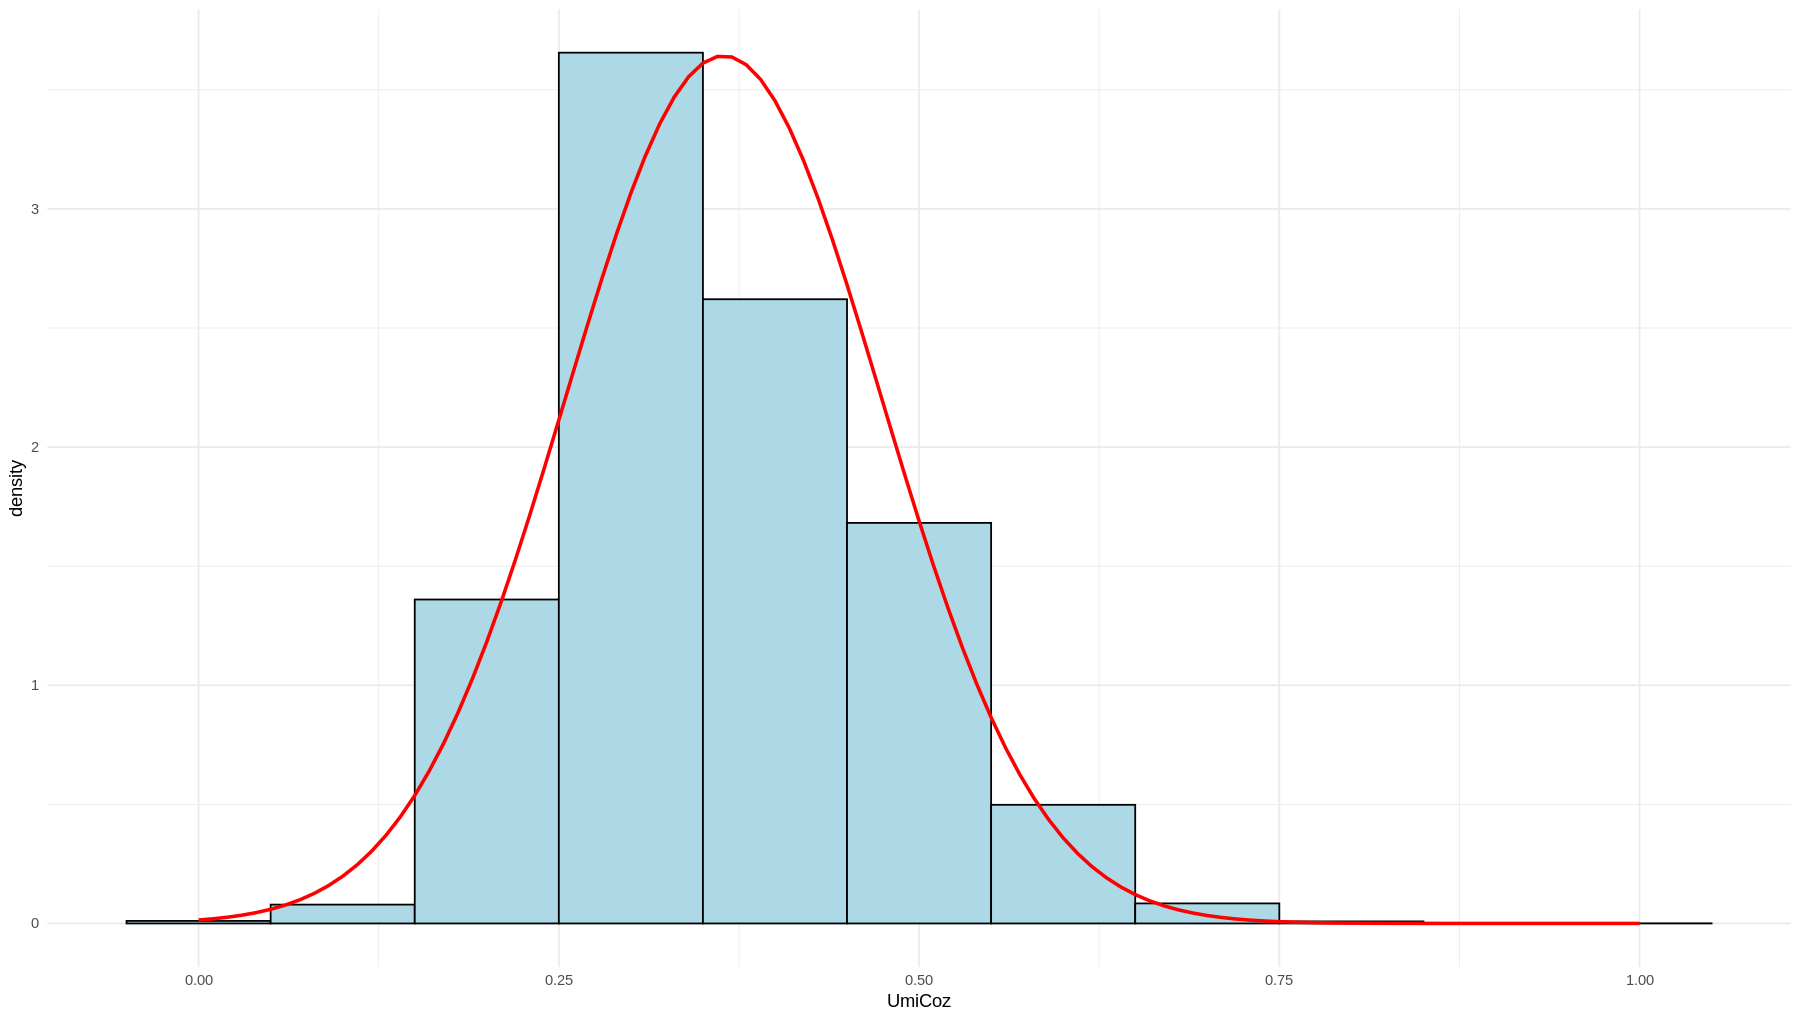

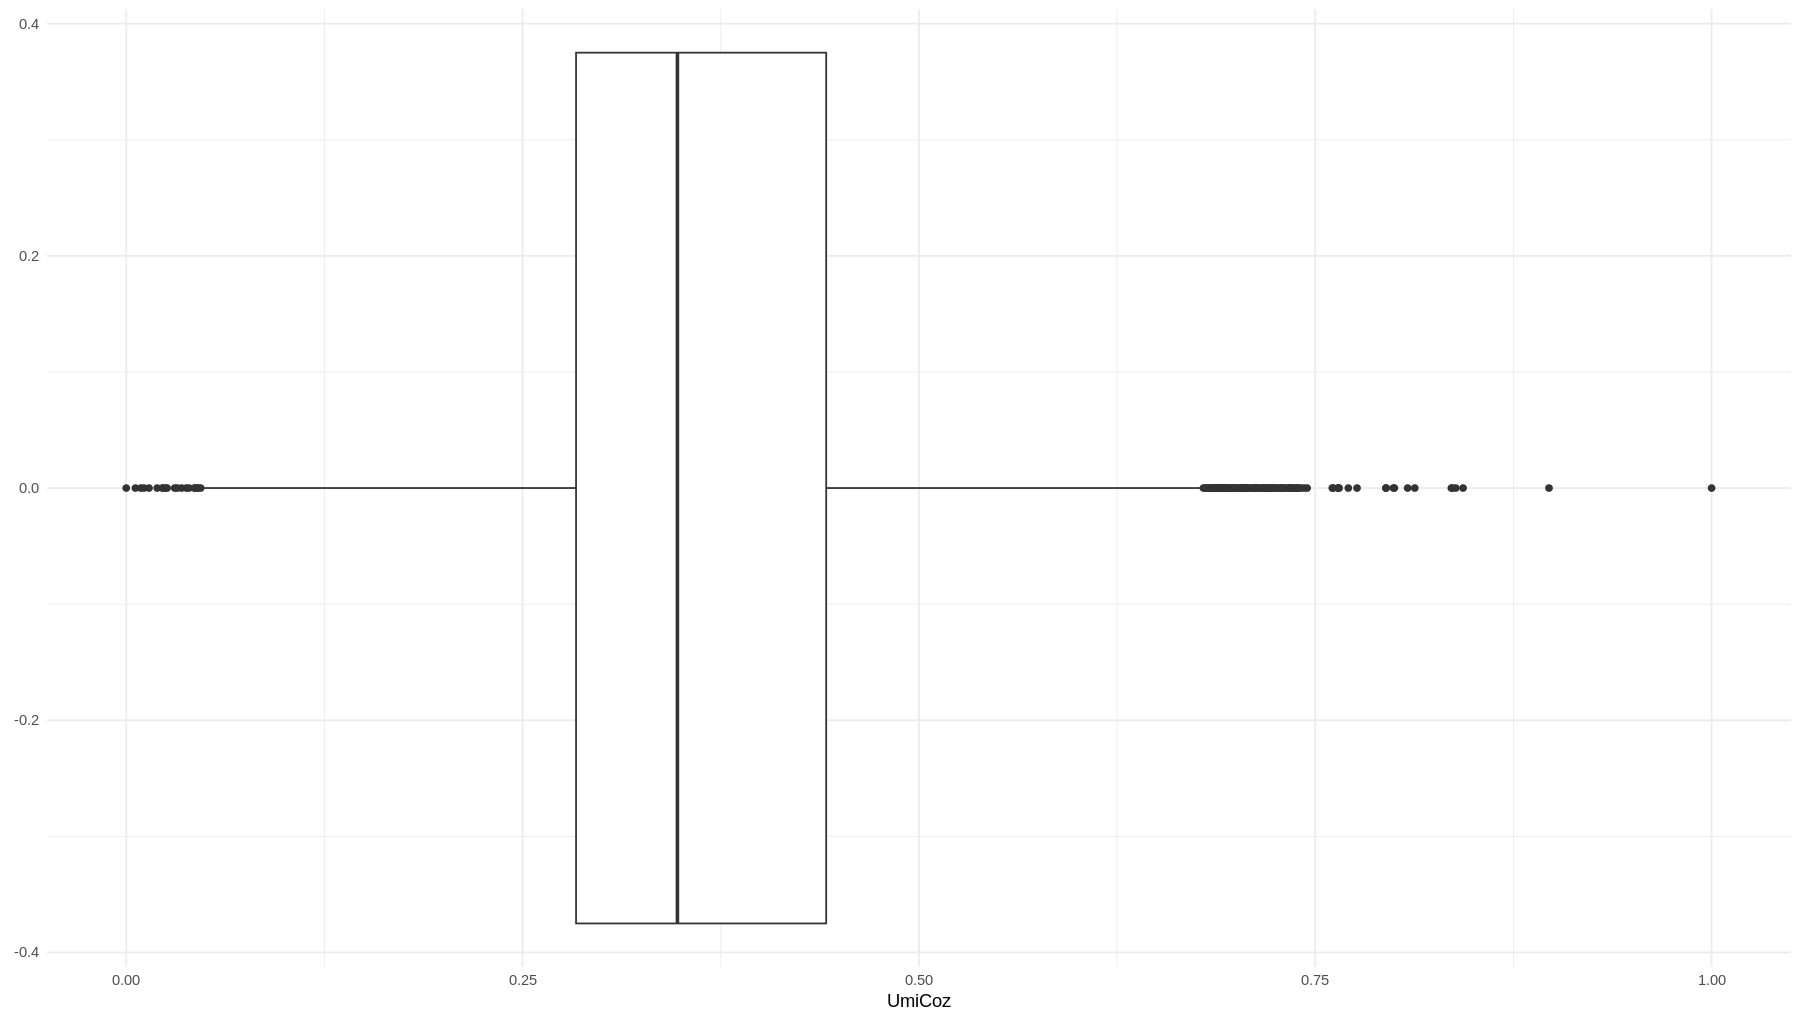

In [30]:
#Gerando um gráfico histograma e ggplot para visualização dos dados da coluna UmiCoz
ggplot(df, aes(x=UmiCoz)) + geom_histogram(aes(y=..density..), binwidth=0.1, color="black", fill="lightblue") +
  stat_function(fun=dnorm, args=list(mean= mean(df$UmiCoz, na.rm=T), sd= sd(df$UmiCoz, na.rm=T)), color="red", size=1) +
  theme_minimal()

ggplot(df, aes(y=UmiCoz)) + geom_boxplot() + coord_flip() + theme_minimal()

18/03

1. Finalizando o tratamento da coluna UmidadeCozinha
2. Testei as forma de remover outliers com Q1, Q3, IQR e 2 * desvio padrão, a melhor forma que achei foi a de 2 * o desvio padrão, os dados parecem que ficaram melhores para visualização com isso.
3. Outra forma que gostei bastante também foi a padronização com Z-score, os dados ficaram extremamente organizados e simples de plotar com ela.
4. Até o momento foi de grande aprendizado, após finalizar todos os tratamentos, vou implementar testes de estatística inferencial para visualizar os dados com suas distribuições e verificar como ficaram os dados.
5. Vou utilizar um modelo de séries temporais com prophet para o modelo de Machine Learning e após tentar implementar um modelo de regressão linear para prever os dados da coluna Usada.
6. Sinto que esse projeto está sendo uma grande evolução nos meus estudos.

#Tratamento da coluna TempSala

In [31]:
summary(df$TempSala)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.10   18.79   20.00   20.34   21.50   29.86 

In [42]:
#Verificando a melhor opção de normalização dos dados, começando pela remoção dos outliers
temp_sala_media = mean(df$TempSala)
temp_sala_desvio = sd(df$TempSala)

#Calculando os valores de Outliers
temp_sala_inferior = temp_sala_media - (2 * temp_sala_desvio)
temp_sala_superior = temp_sala_media + (2 * temp_sala_desvio)

#Por fim, removendo os valores de outliers da coluna TempSala
temp_sala_sem_outliers = df$TempSala[df$TempSala >= temp_sala_inferior & df$TempSala <= temp_sala_superior]

#Visualizando a variável sem outliers
summary(temp_sala_sem_outliers)

length(temp_sala_sem_outliers)


#Normalizando os dados com mínimo-máximo
#df$TempSala = temp_sala_sem_outliers

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.10   18.79   19.86   20.07   21.20   24.73 

[1] 18841